<a href="https://colab.research.google.com/github/carlos-alves-one/-SSDM-Coursework-2/blob/main/Regression_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Statistics and Statistical Data Mining
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework No.2

### Load the data

> Run the code in Python 3

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


> Run the code in R

In [1]:
# Load necessary libraries for this project
library(tidyverse)    # for data manipulation and visualization

install.packages("caret")
library(caret)        # for machine learning

library(rpart)        # for decision trees

install.packages("randomForest")
library(randomForest) # for random forest algorithm

install.packages("gbm")
library(gbm)          # for gradient boosting machines

library(e1071)        # for SVM and other algorithms

# Load the 'readr' library for data import and manipulation in R
library(readr)

# Set seed for reproducibility
set.seed(123)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


Th

In [10]:
# Loading the datasets using base R read.csv function
train_data <- read.csv("/content/drive/MyDrive/credit_risk/creditdefault_train.csv", sep = ",")
test_data  <- read.csv("/content/drive/MyDrive/credit_risk/creditdefault_train.csv", sep = ",")

# Displaying the first few rows of the Credit Default training dataset
head(train_data)

# Displaying the first few rows of the Credit Default test dataset
head(test_data)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,689,0,0,0,0,689,0,0,0,0
2,0,50000,2,2,1,37,0,0,0,0,⋯,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,0,50000,1,2,1,57,-1,0,-1,0,⋯,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,0,50000,1,1,2,37,0,0,0,0,⋯,57608,19394,19619,20024,2500,1815,657,1000,1000,800
5,0,500000,1,1,2,29,0,0,0,0,⋯,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
6,0,100000,2,2,2,23,0,-1,-1,0,⋯,601,221,-159,567,380,601,0,581,1687,1542


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,689,0,0,0,0,689,0,0,0,0
2,0,50000,2,2,1,37,0,0,0,0,⋯,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,0,50000,1,2,1,57,-1,0,-1,0,⋯,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,0,50000,1,1,2,37,0,0,0,0,⋯,57608,19394,19619,20024,2500,1815,657,1000,1000,800
5,0,500000,1,1,2,29,0,0,0,0,⋯,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
6,0,100000,2,2,2,23,0,-1,-1,0,⋯,601,221,-159,567,380,601,0,581,1687,1542


# Problem Formulation

This project aims to predict whether a credit card holder will default on their payment in the next month. We will use a binary classification approach with the response variable Y indicating default payment (Yes = 1, No = 0). The challenge is to build and select a predictive model that performs well on unseen data, balancing the trade-off between underfitting and overfitting.

# Data Exploratory Analysis

## Initial Exploration of the Dataset

In [11]:
# Exploratory Data Analysis
# Summary of the training data
summary(train_data)

       Y                X1               X2              X3      
 Min.   :0.0000   Min.   : 10000   Min.   :1.000   Min.   :0.00  
 1st Qu.:0.0000   1st Qu.: 50000   1st Qu.:1.000   1st Qu.:1.00  
 Median :0.0000   Median :140000   Median :2.000   Median :2.00  
 Mean   :0.2212   Mean   :167450   Mean   :1.605   Mean   :1.85  
 3rd Qu.:0.0000   3rd Qu.:240000   3rd Qu.:2.000   3rd Qu.:2.00  
 Max.   :1.0000   Max.   :800000   Max.   :2.000   Max.   :6.00  
       X4              X5              X6                 X7         
 Min.   :0.000   Min.   :21.00   Min.   :-2.00000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.00000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.00000   Median : 0.0000  
 Mean   :1.556   Mean   :35.37   Mean   :-0.02047   Mean   :-0.1309  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.00000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :75.00   Max.   : 8.00000   Max.   : 8.0000  
       X8               X9               X10    

**Given the detailed information about the variables in the dataset, we can draw some conclusions and suggest potential steps for further analysis:**

- The dataset contains 24 columns and 15,000 rows, all being integer type

## Variable Types and Conversion


- X1 (Credit Amount): This should be a numeric variable as it represents amounts in dollars.

- X2 (Gender): Since it is coded as 1 (male) and 2 (female), it is a categorical variable. Consider converting it to a factor with two levels.

- X3 (Education), X4 (Marital Status): These are categorical variables and should be converted to factors with their respective levels.

- X5 (Age): This is a numeric variable.

- X6-X11 (Repayment Status): These are ordinal categorical variables. They have an inherent order (-1, 1, 2, ..., 9) and should be treated as factors with ordered levels.

- X12-X17 (Bill Statement Amount), X18-X23 (Previous Payment Amount): These should be numeric variables representing monetary values.


## Data Integrity and Cleaning

- We need to ensure that the data types in the dataset match these specifications. They must be converted to the appropriate types if they are all currently 'character' types.

- Check for missing or unusual values. For example, ensure that only the specified categories are present in categorical variables.

### Check for Missing Values

In [12]:
# Check for missing values in the training dataset
sum(is.na(train_data))


[1] 0

The output is zero, meaning there are no missing values (NA) in the train_data dataset. Every element in the dataset has a defined, non-missing value. This is generally a good sign for data quality, as missing data can complicate analysis and require additional steps for handling.

## Visualizing Distributions of Variables

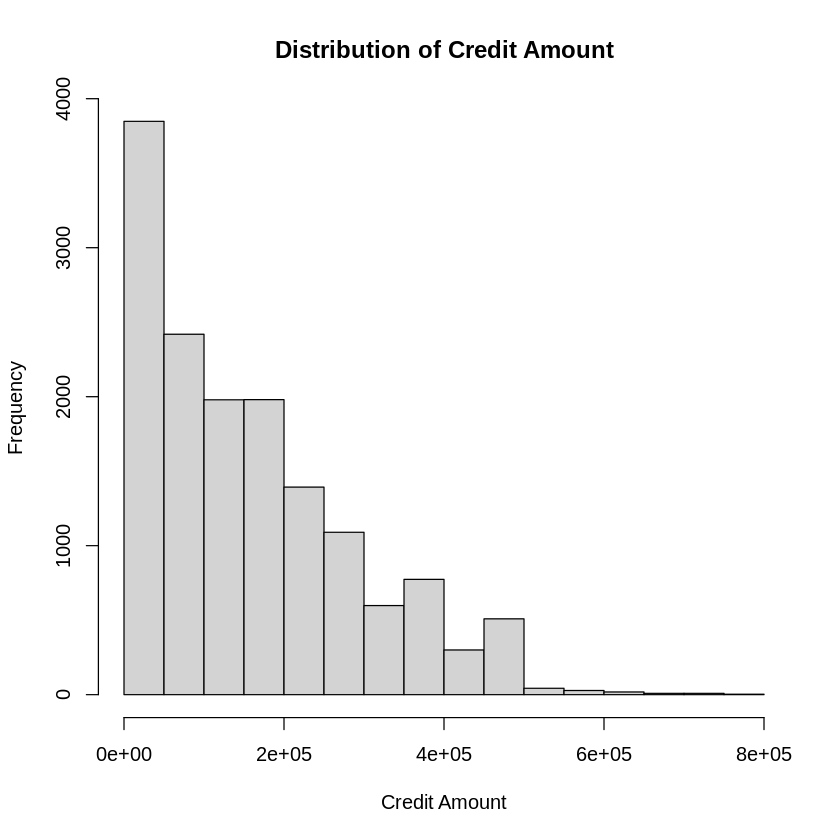

In [17]:
# Plotting the distribution of Credit Amount in the training data
hist(train_data$X1, main = "Distribution of Credit Amount", xlab = "Credit Amount")


The histogram above displays the distribution of credit amounts. The X-axis, labelled "Credit Amount," shows the range of credit amounts, and the Y-axis, labelled "Frequency," indicates how often each range of credit amounts occurs within the dataset.

Here are a few observations:

- The distribution is right-skewed, meaning there are more lower credit amounts than higher ones.
- Most credit amounts are concentrated in the lower range (close to 0).
- As the credit amount increases, the frequency of those credit amounts decreases.
- Very few high credit amounts are compared to the lower and middle ranges.

This distribution is standard in financial data, where many people take out small loans, and fewer take out substantial loans. For a financial institution, the analysis could suggest focusing its products and services towards individuals who require smaller credit amounts, as that is where the highest customer frequency lies.

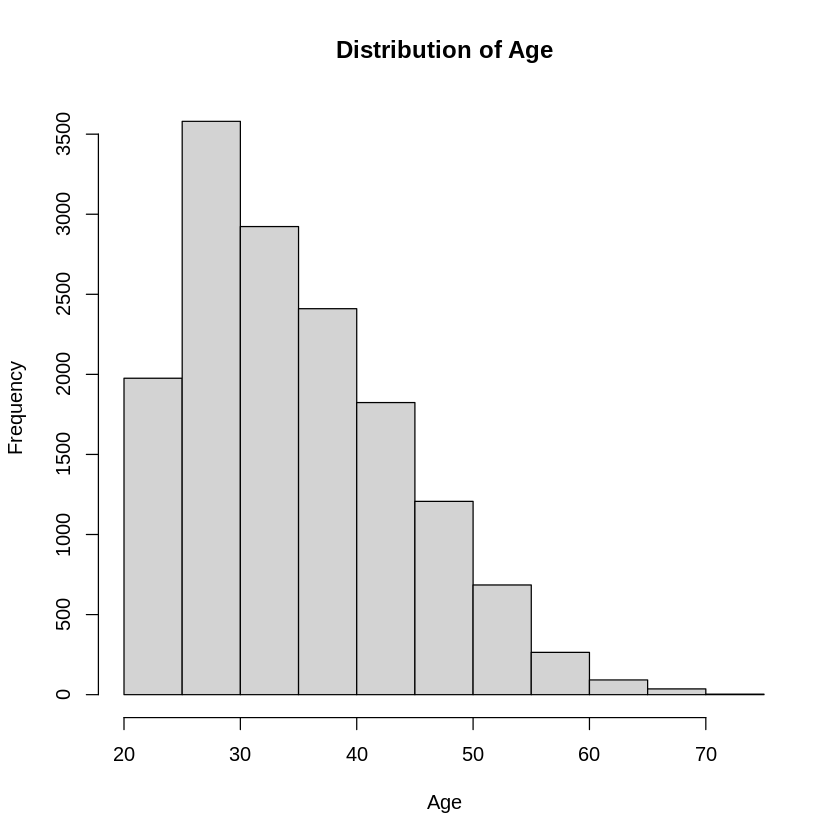

In [18]:
# Plotting the distribution of Age in the training data
hist(train_data$X5, main = "Distribution of Age", xlab = "Age")


The histogram above shows the distribution of ages within a credit risk dataset. Here are the key observations from the histogram:

- The age distribution is somewhat left-skewed, indicating a younger population, with the frequency decreasing as age increases.
- The highest frequency of individuals falls within the late 20s to early 30s, which may reflect the age group actively seeking credit.
- There is a gradual decline in frequency from this peak as age increases, with very few individuals in the dataset in their late 60s. This could suggest that older individuals are less likely to apply for credit or are underrepresented in this dataset.
- There are significantly fewer individuals in the dataset who are 20 years old than those in their late 20s. This could suggest that the credit risk dataset may include fewer young adults, possibly due to lower credit demand or eligibility at that age.

These findings could imply that the credit risk dataset represents a working-age population likely to be in the active credit market. This might be typical for credit scoring models, financial product development, or risk assessment studies. If a financial institution uses this data, it might suggest that most of its credit products should be tailored to meet the needs of young to middle-aged adults.